# AI ODYSSEY: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('new_dataset.csv')
df.head()

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
#ENTER YOUR CODE HERE

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text
0,Negative,oh ! u order ? 's horribl
1,Negative,great hard train weekend . coupl day rest let ...
2,Negative,"right , work 5 hour go 'm free xd"
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
#ENTER YOUR CODE HERE

In [27]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.head()

,sentiment,text
0,Negative,oh u order s horribl
1,Negative,great hard train weekend coupl day rest let ...
2,Negative,right work 5 hour go m free xd
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE

In [28]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,sentiment,text
0,Negative,oh u order s horribl
1,Negative,great hard train weekend coupl day rest let lo...
2,Negative,right work 5 hour go m free xd
3,Negative,crave japan food
4,Negative,jean michel jarr concert tomorrow got ta work ...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

Text(0.5, 1.0, 'Positive Words')

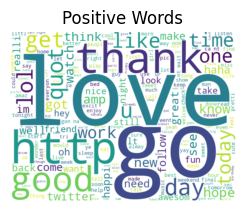

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'sentiment' column contains 1 for positive and 0 for negative
positive_tweets = df[df['sentiment'] == 'Positive']
negative_tweets = df[df['sentiment'] == 'Negative']

positive_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stop_words).generate(' '.join(positive_tweets['text']))

# Display the word clouds
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

In [ ]:
#ENTER YOUR CODE HERE

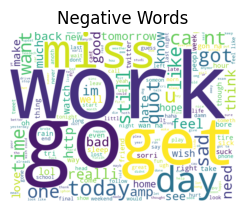

In [30]:
negative_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stop_words).generate(' '.join(negative_tweets['text']))

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [31]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.1, random_state=42)
print("Training Set Size:",train.shape[0])
print("Test Set Size:",test.shape[0])

Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words=len(set(train['text'].sum()))
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(train['text'])
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 11022


**Now transform the training and testing word sequences.**

In [ ]:
#ENTER YOUR CODE HERE

In [33]:
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
max_length = 36
print('Training data:')
print(train_sequences[0])
print('Testing data:')
print(test_sequences[0])

Training data:
[27, 16, 6]
Testing data:
[9]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(x) for x in train_sequences])
train_padded = pad_sequences(train_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)
print('Training data:')
print(train_padded[0])
print('Testing data:')
print(test_padded[0])

Training data:
[ 0  0  0  0  0  0  0  0 27 16  6]
Testing data:
[0 0 0 0 0 0 0 0 0 0 9]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train['sentiment'])
y_test = le.transform(test['sentiment'])

print('The training labels:')
print(y_train)
print('The testing labels:')
print(y_test)

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [12]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-26 17:27:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-26 17:27:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 17:27:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [40]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
MAX_SEQUENCE_LENGTH = train_padded.shape[1]
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)

Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [41]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

In [42]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 11)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 11, 300)           3306600   
                                                                 
 spatial_dropout1d_4 (Spati  (None, 11, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_4 (Conv1D)           (None, 7, 64)             96064     
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

In [43]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/10
282/282 - 25s - loss: 0.6615 - accuracy: 0.5842 - val_loss: 0.6471 - val_accuracy: 0.5800 - 25s/epoch - 90ms/step
Epoch 2/10
282/282 - 18s - loss: 0.6393 - accuracy: 0.6180 - val_loss: 0.6446 - val_accuracy: 0.5840 - 18s/epoch - 65ms/step
Epoch 3/10
282/282 - 12s - loss: 0.6250 - accuracy: 0.6249 - val_loss: 0.6389 - val_accuracy: 0.5940 - 12s/epoch - 42ms/step
Epoch 4/10
282/282 - 18s - loss: 0.6195 - accuracy: 0.6371 - val_loss: 0.6340 - val_accuracy: 0.6080 - 18s/epoch - 64ms/step
Epoch 5/10
282/282 - 12s - loss: 0.6064 - accuracy: 0.6439 - val_loss: 0.6360 - val_accuracy: 0.6170 - 12s/epoch - 43ms/step
Epoch 6/10
282/282 - 18s - loss: 0.5979 - accuracy: 0.6554 - val_loss: 0.6443 - val_accuracy: 0.5960 - 18s/epoch - 62ms/step
Epoch 7/10
282/282 - 15s - loss: 0.5848 - accuracy: 0.6583 - val_loss: 0.6595 - val_accuracy: 0.5790 - 15s/epoch - 53ms/step
Epoch 8/10
282/282 - 22s - loss: 0.5747 - accuracy: 0.6756 - val_loss: 0.6657 - val_accuracy: 0.5780 - 22s/epoch - 78ms/step


**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

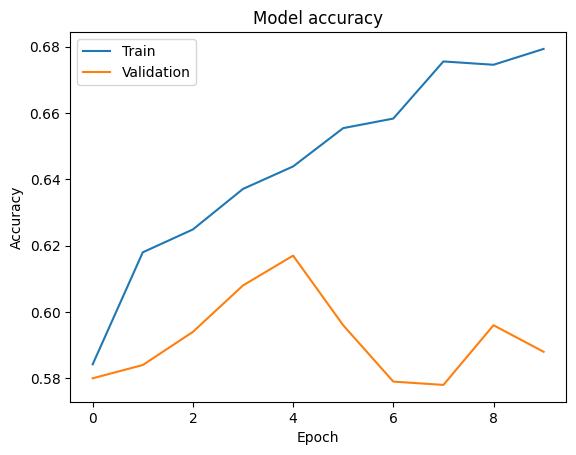

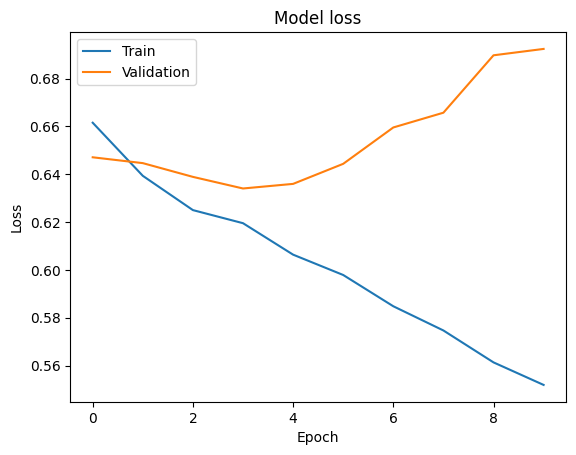

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

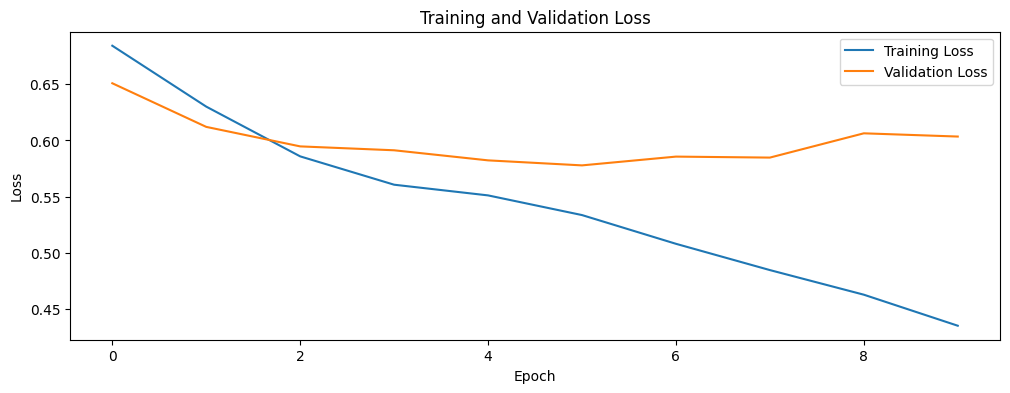

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [46]:
loss, accuracy = model.evaluate(test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

32/32 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5880
Test Loss: 0.6923661231994629
Test Accuracy: 0.5879999995231628


**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

NameError: name 'clean_text' is not defined

In [ ]:
#ENTER YOUR CODE HERE

['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [ ]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!